In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
xtrain, xtest = xtrain/255.0, xtest/255.0
xval, yval = xtrain[50000:], ytrain[50000:]
xtrain, ytrain = xtrain[:50000], ytrain[:50000]

## 1. Testing different activations
### 1.1 Relu

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
relu_acc, relu_valacc = history.history['accuracy'], history.history['val_accuracy']
relu_loss, relu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.2976 - accuracy: 0.6326 - val_loss: 0.8870 - val_accuracy: 0.7233
Epoch 2/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.7866 - accuracy: 0.7445 - val_loss: 0.7171 - val_accuracy: 0.7582
Epoch 3/10
50000/50000 [==============================] - 2s 44us/sample - loss: 0.6714 - accuracy: 0.7785 - val_loss: 0.6450 - val_accuracy: 0.7861
Epoch 4/10
50000/50000 [==============================] - 2s 44us/sample - loss: 0.6111 - accuracy: 0.7988 - val_loss: 0.5982 - val_accuracy: 0.7996
Epoch 5/10
50000/50000 [==============================] - 2s 45us/sample - loss: 0.5720 - accuracy: 0.8114 - val_loss: 0.5954 - val_accuracy: 0.7872
Epoch 6/10
50000/50000 [==============================] - 3s 52us/sample - loss: 0.5442 - accuracy: 0.8194 - val_loss: 0.5419 - val_accuracy: 0.8180
Epoch 7/10
50000/50000 [==============================] 

### 1.2 LeakyRELU

In [21]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
leaky_relu_acc, leaky_relu_valacc = history.history['accuracy'], history.history['val_accuracy']
leaky_relu_loss, leaky_relu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 50us/sample - loss: 1.2348 - accuracy: 0.6330 - val_loss: 0.8538 - val_accuracy: 0.7213
Epoch 2/10
50000/50000 [==============================] - 2s 44us/sample - loss: 0.7643 - accuracy: 0.7458 - val_loss: 0.6991 - val_accuracy: 0.7624
Epoch 3/10
50000/50000 [==============================] - 2s 44us/sample - loss: 0.6572 - accuracy: 0.7811 - val_loss: 0.6315 - val_accuracy: 0.7884
Epoch 4/10
50000/50000 [==============================] - 2s 45us/sample - loss: 0.6004 - accuracy: 0.8024 - val_loss: 0.5881 - val_accuracy: 0.7994
Epoch 5/10
50000/50000 [==============================] - 3s 54us/sample - loss: 0.5641 - accuracy: 0.8138 - val_loss: 0.5826 - val_accuracy: 0.7933
Epoch 6/10
50000/50000 [==============================] - 2s 42us/sample - loss: 0.5381 - accuracy: 0.8205 - val_loss: 0.5354 - val_accuracy: 0.8181
Epoch 7/10
50000/50000 [==============================] 

### 1.3 Parametric ReLU

In [22]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
prelu_acc, prelu_valacc = history.history['accuracy'], history.history['val_accuracy']
prelu_loss, prelu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 68us/sample - loss: 1.2968 - accuracy: 0.6328 - val_loss: 0.8866 - val_accuracy: 0.7230
Epoch 2/10
50000/50000 [==============================] - 2s 49us/sample - loss: 0.7863 - accuracy: 0.7446 - val_loss: 0.7169 - val_accuracy: 0.7579
Epoch 3/10
50000/50000 [==============================] - 2s 49us/sample - loss: 0.6712 - accuracy: 0.7786 - val_loss: 0.6449 - val_accuracy: 0.7858
Epoch 4/10
50000/50000 [==============================] - 2s 47us/sample - loss: 0.6109 - accuracy: 0.7988 - val_loss: 0.5981 - val_accuracy: 0.7995
Epoch 5/10
50000/50000 [==============================] - 2s 46us/sample - loss: 0.5719 - accuracy: 0.8113 - val_loss: 0.5954 - val_accuracy: 0.7873
Epoch 6/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.5440 - accuracy: 0.8194 - val_loss: 0.5417 - val_accuracy: 0.8183
Epoch 7/10
50000/50000 [==============================] 

### 1.4 ELU

In [23]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation = 'elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation = 'elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
elu_acc, elu_valacc = history.history['accuracy'], history.history['val_accuracy']
elu_loss, elu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 50us/sample - loss: 1.0814 - accuracy: 0.6569 - val_loss: 0.7694 - val_accuracy: 0.7409
Epoch 2/10
50000/50000 [==============================] - 2s 48us/sample - loss: 0.6977 - accuracy: 0.7662 - val_loss: 0.6477 - val_accuracy: 0.7762
Epoch 3/10
50000/50000 [==============================] - 2s 35us/sample - loss: 0.6111 - accuracy: 0.7962 - val_loss: 0.5927 - val_accuracy: 0.7961
Epoch 4/10
50000/50000 [==============================] - 2s 34us/sample - loss: 0.5646 - accuracy: 0.8117 - val_loss: 0.5566 - val_accuracy: 0.8050
Epoch 5/10
50000/50000 [==============================] - 2s 34us/sample - loss: 0.5349 - accuracy: 0.8200 - val_loss: 0.5499 - val_accuracy: 0.8013
Epoch 6/10
50000/50000 [==============================] - 2s 35us/sample - loss: 0.5139 - accuracy: 0.8259 - val_loss: 0.5144 - val_accuracy: 0.8198
Epoch 7/10
50000/50000 [==============================] 

### 1.5 SELU

In [48]:
tf.random.set_seed(42)
np.random.seed(42)

pixel_means = xtrain.mean(axis=0, keepdims=True)
pixel_stds = xtrain.std(axis=0, keepdims=True)
xtrain_scaled = (xtrain - pixel_means) / pixel_stds
xval_scaled = (xval - pixel_means) / pixel_stds
xtest_scaled = (xtest - pixel_means) / pixel_stds

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation = 'selu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation = 'selu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain_scaled, ytrain, validation_data = (xval_scaled, yval), epochs = 10, batch_size = 256)
selu_acc, selu_valacc = history.history['accuracy'], history.history['val_accuracy']
selu_loss, selu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 67us/sample - loss: 0.7438 - accuracy: 0.7509 - val_loss: 0.5591 - val_accuracy: 0.8074
Epoch 2/10
50000/50000 [==============================] - 3s 50us/sample - loss: 0.5066 - accuracy: 0.8252 - val_loss: 0.4985 - val_accuracy: 0.8274
Epoch 3/10
50000/50000 [==============================] - 3s 51us/sample - loss: 0.4564 - accuracy: 0.8421 - val_loss: 0.4688 - val_accuracy: 0.8362
Epoch 4/10
50000/50000 [==============================] - 3s 54us/sample - loss: 0.4276 - accuracy: 0.8521 - val_loss: 0.4460 - val_accuracy: 0.8439
Epoch 5/10
50000/50000 [==============================] - 2s 47us/sample - loss: 0.4082 - accuracy: 0.8577 - val_loss: 0.4395 - val_accuracy: 0.8462
Epoch 6/10
50000/50000 [==============================] - 2s 44us/sample - loss: 0.3935 - accuracy: 0.8628 - val_loss: 0.4253 - val_accuracy: 0.8495
Epoch 7/10
50000/50000 [==============================] 

<AxesSubplot:title={'center':'Validation Accuracy'}>

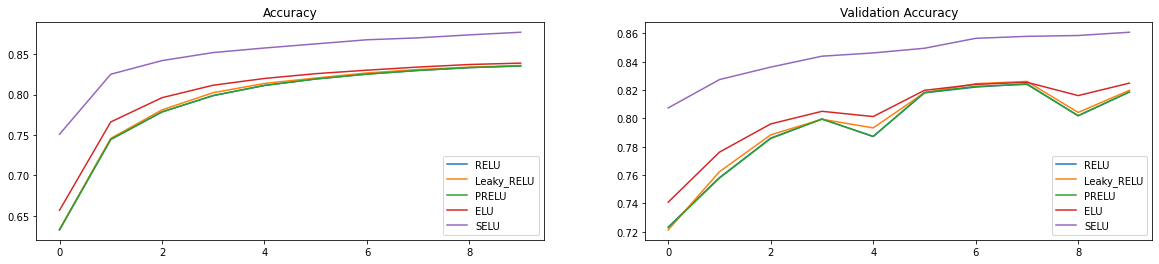

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.title("Accuracy")
sns.lineplot(np.arange(10), relu_acc, label='RELU')
sns.lineplot(np.arange(10), leaky_relu_acc, label='Leaky_RELU')
sns.lineplot(np.arange(10), prelu_acc, label='PRELU')
sns.lineplot(np.arange(10), elu_acc, label='ELU')
sns.lineplot(np.arange(10), selu_acc, label='SELU')

plt.subplot(122)
plt.title("Validation Accuracy")
sns.lineplot(np.arange(10), relu_valacc, label='RELU')
sns.lineplot(np.arange(10), leaky_relu_valacc, label='Leaky_RELU')
sns.lineplot(np.arange(10), prelu_valacc, label='PRELU')
sns.lineplot(np.arange(10), elu_valacc, label='ELU')
sns.lineplot(np.arange(10), selu_valacc, label='SELU')


## Observations

* Despite running for short epochs, SELU clearly outperforming other variants
* As the usual trend goes, we see SELU > ELU > PRELU, LeakyRelu > RELU

## 2. Batch Normalization

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = 'softmax')    
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
bn_acc, bn_valacc = history.history['accuracy'], history.history['val_accuracy']
bn_loss, bn_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 105us/sample - loss: 0.8322 - accuracy: 0.7251 - val_loss: 0.8040 - val_accuracy: 0.7709
Epoch 2/10
50000/50000 [==============================] - 4s 81us/sample - loss: 0.5372 - accuracy: 0.8169 - val_loss: 0.5270 - val_accuracy: 0.8183
Epoch 3/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.4763 - accuracy: 0.8331 - val_loss: 0.4731 - val_accuracy: 0.8310
Epoch 4/10
50000/50000 [==============================] - 4s 73us/sample - loss: 0.4406 - accuracy: 0.8466 - val_loss: 0.4495 - val_accuracy: 0.8403
Epoch 5/10
50000/50000 [==============================] - 4s 74us/sample - loss: 0.4170 - accuracy: 0.8544 - val_loss: 0.4330 - val_accuracy: 0.8440
Epoch 6/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.3984 - accuracy: 0.8611 - val_loss: 0.4198 - val_accuracy: 0.8487
Epoch 7/10
50000/50000 [==============================]

In [52]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_54 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_55 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_56 (Dense)             (None, 10)              

* The number of parameters in batch norm are 4*number of features. 4 corresponding to $\gamma, \beta$ (the scaling and shifting of normalized inputs), $\mu, \sigma$ (moving avg of mean, std dev of training data)

<AxesSubplot:title={'center':'Validation Accuracy'}>

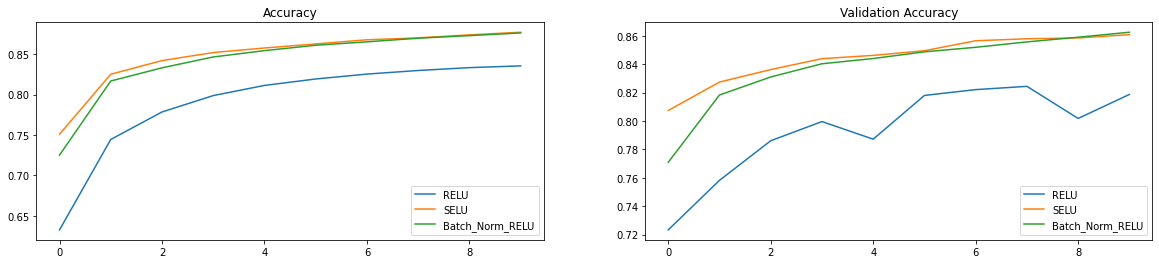

In [54]:
fig = plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.title("Accuracy")
sns.lineplot(np.arange(10), relu_acc, label='RELU')
sns.lineplot(np.arange(10), selu_acc, label='SELU')
sns.lineplot(np.arange(10), bn_acc, label='Batch_Norm_RELU')

plt.subplot(122)
plt.title("Validation Accuracy")
sns.lineplot(np.arange(10), relu_valacc, label='RELU')
sns.lineplot(np.arange(10), selu_valacc, label='SELU')
sns.lineplot(np.arange(10), bn_valacc, label='Batch_Norm_RELU')

### Observations

* SELU and BatchNorm are almost similar performance. They indeed do similar transformation

* If you use SELU it does take care of normalizations and separate BatchNorm layer is not required

In [55]:
### Batch Norm without Bias

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(100, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
bn1_acc, bn1_valacc = history.history['accuracy'], history.history['val_accuracy']
bn1_loss, bn1_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 217us/sample - loss: 0.9604 - accuracy: 0.6995 - val_loss: 0.8965 - val_accuracy: 0.7803
Epoch 2/10
50000/50000 [==============================] - 5s 91us/sample - loss: 0.6059 - accuracy: 0.8040 - val_loss: 0.5868 - val_accuracy: 0.8117
Epoch 3/10
50000/50000 [==============================] - 4s 81us/sample - loss: 0.5275 - accuracy: 0.8254 - val_loss: 0.5095 - val_accuracy: 0.8247
Epoch 4/10
50000/50000 [==============================] - 4s 82us/sample - loss: 0.4817 - accuracy: 0.8373 - val_loss: 0.4748 - val_accuracy: 0.8355
Epoch 5/10
50000/50000 [==============================] - 4s 82us/sample - loss: 0.4527 - accuracy: 0.8470 - val_loss: 0.4522 - val_accuracy: 0.8415
Epoch 6/10
50000/50000 [==============================] - 5s 91us/sample - loss: 0.4292 - accuracy: 0.8529 - val_loss: 0.4347 - val_accuracy: 0.8488
Epoch 7/10
50000/50000 [==============================

<AxesSubplot:title={'center':'Validation Accuracy'}>

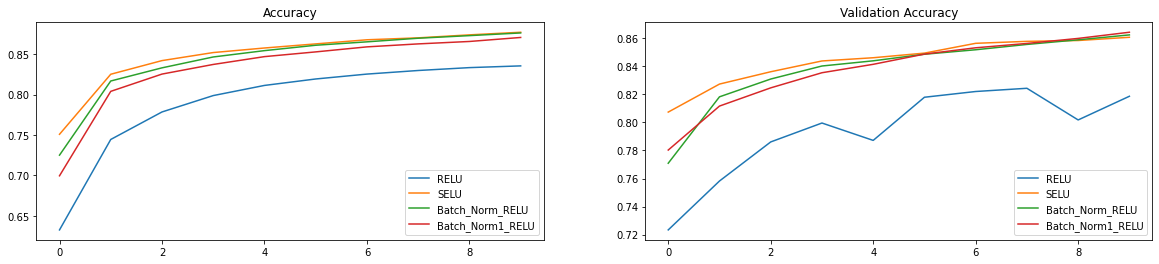

In [58]:
fig = plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.title("Accuracy")
sns.lineplot(np.arange(10), relu_acc, label='RELU')
sns.lineplot(np.arange(10), selu_acc, label='SELU')
sns.lineplot(np.arange(10), bn_acc, label='Batch_Norm_RELU')
sns.lineplot(np.arange(10), bn1_acc, label='Batch_Norm1_RELU')

plt.subplot(122)
plt.title("Validation Accuracy")
sns.lineplot(np.arange(10), relu_valacc, label='RELU')
sns.lineplot(np.arange(10), selu_valacc, label='SELU')
sns.lineplot(np.arange(10), bn_valacc, label='Batch_Norm_RELU')
sns.lineplot(np.arange(10), bn1_valacc, label='Batch_Norm1_RELU')

### Observations

* Using BN before or after activations doesnt seem to yield clearer difference in behavior